In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import sklearn
import umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.manifold import Isomap
import seaborn as sn

In [9]:
sr = pd.read_csv("data/speech_reading.csv")
sm = pd.read_csv("data/speech_monologue.csv")
sr = sr.add_suffix("_reading")
sm = sm.add_suffix("_monologue")



In [10]:
other = pd.read_csv("data/all_except_speech.csv", sep=';')

In [11]:
other

,patient,Age,Gender,ParkinsonFamHistory,AgeOnset,DurationFirstSymptoms,DepressTherapy,ParkinsonMed,PsychoticMed,Benzodiazepine,...,RapidAlternatingMovementsRUE,RapidAlternatingMovementsLUE,LegAgilityRLE,LegAgilityLLE,ArisingFromChair,Posture,Gait,PosturalStability,BodyBradykinesiaHypokinesia,group
0,PD01,58,F,No,56,2,No,No,No,No,...,0,1,0,0,0,0,0,0,0,1
1,PD02,68,F,No,67,1,No,No,No,No,...,1,2,1,2,0,1,0,1,1,1
2,PD03,68,M,No,67,1,No,No,No,No,...,0,0,1,2,0,3,0,0,2,1
3,PD04,75,M,No,73,2,No,No,No,No,...,1,2,1,0,0,1,1,0,1,1
4,PD05,61,M,Yes,60,"0,7",No,No,No,No,...,2,3,1,3,1,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,HC46,69,M,-,-,-,No,No,No,No,...,-,-,-,-,-,-,-,-,-,3
126,HC47,68,M,-,-,-,No,No,No,No,...,-,-,-,-,-,-,-,-,-,3
127,HC48,53,M,-,-,-,No,No,No,No,...,-,-,-,-,-,-,-,-,-,3
128,HC49,44,M,-,-,-,No,No,No,No,...,-,-,-,-,-,-,-,-,-,3


In [12]:
gender = other["Gender"]
duration = other["DurationFirstSymptoms"]

# NOTES:
- Jeste by mozna stalo za hrich zkusit clustrovani i podle pohlavi treba?
- Treba by to mohlo vysvetlit ty mensi clustriky co jsou u UMAPU
- krizek -> chlap, kolecko -> zenska, treba

# Clustering with LDA
- Remember that LDA makes assumptions about normally distributed classes and equal class covariances.

In [13]:
# plot helpers
lw = 2
colors = ["navy", "turquoise", "darkorange"]
target_names = ["PD", "RD", "HC"]
labels = [1, 2, 3]

lda = LinearDiscriminantAnalysis(n_components=2)

### Clustering for reading only

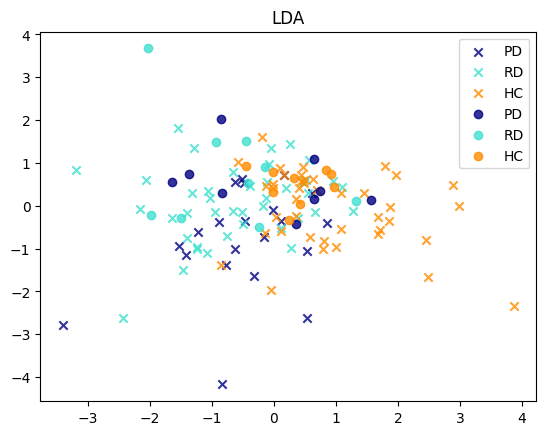

In [14]:
X = sr.drop('group_reading', axis=1)
y = sr['group_reading']

X_2comp = lda.fit(X, y).transform(X)

X_2comp_m = X_2comp[gender == "M"]
X_2comp_f = X_2comp[gender == "F"]

y_m = y[gender == "M"]
y_f = y[gender == "F"]

X_comps = [X_2comp_m, X_2comp_f]
shapes =['x','o']
ys = [y_m, y_f]

plt.figure()

for X_comp_i, shape, y_ in zip(X_comps, shapes, ys):
    for color, i, target_name in zip(colors, labels, target_names):
        plt.scatter(
            X_comp_i[y_ == i, 0], X_comp_i[y_ == i, 1], alpha=0.8, color=color, label=target_name, marker = shape
        )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA")
plt.show()

### Clustering for monologue only

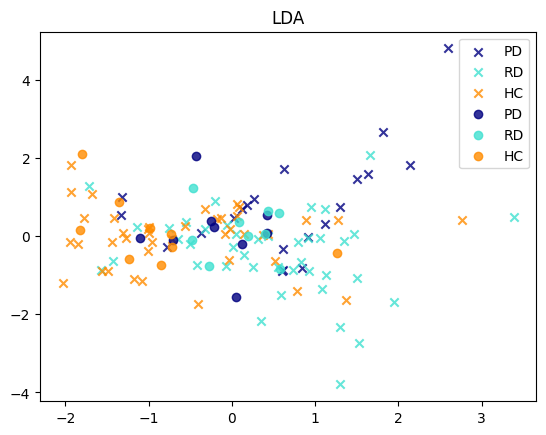

In [15]:
X = sm.drop('group_monologue', axis=1)
y = sm['group_monologue']

X_2comp = lda.fit(X, y).transform(X)

X_2comp_m = X_2comp[gender == "M"]
X_2comp_f = X_2comp[gender == "F"]

y_m = y[gender == "M"]
y_f = y[gender == "F"]

X_comps = [X_2comp_m, X_2comp_f]
shapes =['x','o']
ys = [y_m, y_f]

plt.figure()

for X_comp_i, shape, y_ in zip(X_comps, shapes, ys):
    for color, i, target_name in zip(colors, labels, target_names):
        plt.scatter(
            X_comp_i[y_ == i, 0], X_comp_i[y_ == i, 1], alpha=0.8, color=color, label=target_name, marker = shape
        )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA")
plt.show()

### Clustering with LDA using monologue + reading
- we can see 3, albeit overlapping clusters, meaning that the groups can be separated by these variables but not super well

In [16]:
# Join data horizontaly
sr = sr.drop("group_reading", axis=1)
data = pd.concat([sr, sm], axis=1)
data.rename(columns = {'group_monologue':'group'}, inplace=True)

X = data.drop('group', axis = 1)
y = data['group']

103
27


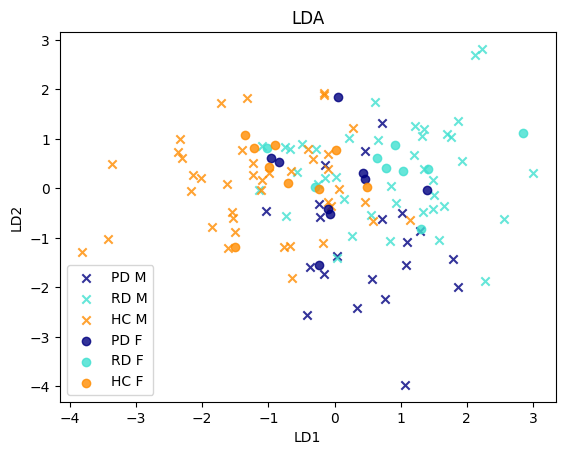

In [17]:
X_2comp = lda.fit(X, y).transform(X)

X_2comp_m = X_2comp[gender == "M"]
X_2comp_f = X_2comp[gender == "F"]

y_m = y[gender == "M"]
y_f = y[gender == "F"]

X_comps = [X_2comp_m, X_2comp_f]
shapes =['x','o']
ys = [y_m, y_f]
gs = ['M','F']

plt.figure()

for X_comp_i, shape, y_, g in zip(X_comps, shapes, ys, gs):
    print(len(y_))
    for color, i, target_name in zip(colors, labels, target_names):
        plt.scatter(
            X_comp_i[y_ == i, 0], X_comp_i[y_ == i, 1], alpha=0.8, color=color, label=f"{target_name} {g}", marker = shape
        )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()

# PCA

explained variance [0.44918608 0.26816147]
103
27


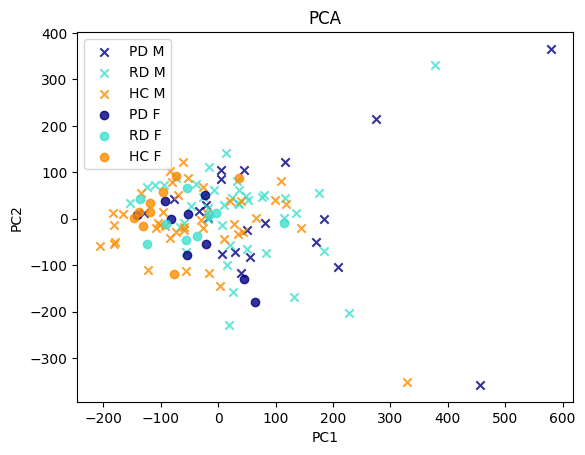

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)
print(f"explained variance {pca.explained_variance_ratio_}")

X_pca_m = X_pca[gender == "M"]
X_pca_f = X_pca[gender == "F"]

y_m = y[gender == "M"]
y_f = y[gender == "F"]

X_comps = [X_pca_m, X_pca_f]
shapes =['x','o']
ys = [y_m, y_f]
gs = ['M','F']

plt.figure()

for X_comp_i, shape, y_, g in zip(X_comps, shapes, ys, gs):
    print(len(y_))
    for color, i, target_name in zip(colors, labels, target_names):
        plt.scatter(
            X_comp_i[y_ == i, 0], X_comp_i[y_ == i, 1], alpha=0.8, color=color, label=f"{target_name} {g}", marker = shape
        )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")

plt.show()

explained variance [0.44918608 0.26816147 0.11968616]


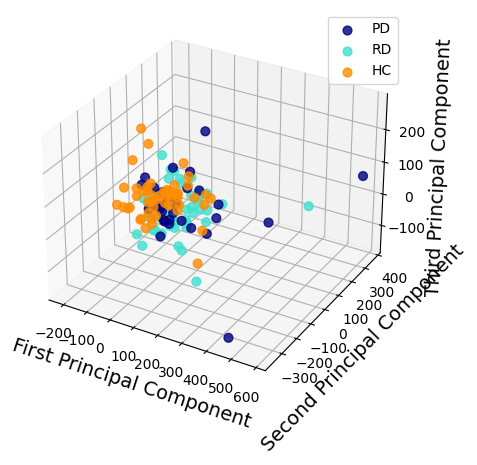

In [19]:
pca = PCA(n_components=3)
X_pca = pca.fit(X).transform(X)
print(f"explained variance {pca.explained_variance_ratio_}")

cdict = {1:'navy',2:'turquoise', 3:'darkorange'}
labl = {1:'PD',2:'RD', 3:'HC'}

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], alpha=0.8)

# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

## Nelinearni clustering

- To se dela na zaklade toho ktere body jsou u sebe blizko, (blizko ve vysoke dim. == blizko v nizke dim.)
- UMAP vychazi asi docela pekne? Jsou tam takove mensi clustriky rozdelene
    - HC jsou v takovem bananu
    - vpravo je hodne HC a par RD, a skoro zadny PD
    - vlevo nahore je vetsi cluster modrych spolu a vlevo dole je mensi cluster modrych spolu

### UMAP

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Text(0.5, 1.0, 'UMAP')

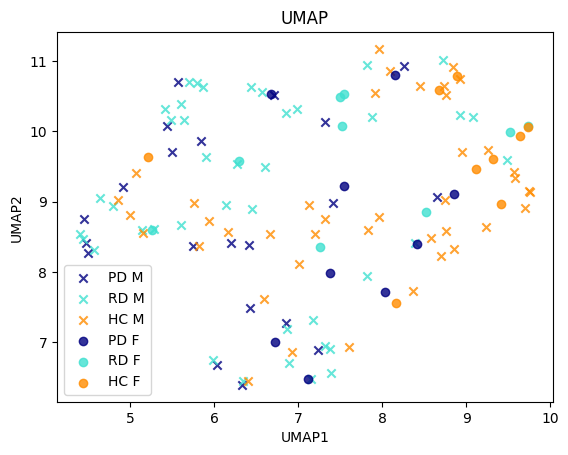

In [20]:
X_umap = umap.UMAP(n_neighbors = 10, min_dist=0.01).fit_transform(X)

X_umap_m = X_umap[gender == "M"]
X_umap_f = X_umap[gender == "F"]

y_m = y[gender == "M"]
y_f = y[gender == "F"]

X_comps = [X_umap_m, X_umap_f]
shapes =['x','o']
ys = [y_m, y_f]
gender = ['M','F']

plt.figure()

for X_comp_i, shape, y_, g in zip(X_comps, shapes, ys, gender):
    for color, i, target_name in zip(colors, labels, target_names):
        plt.scatter(
            X_comp_i[y_ == i, 0], X_comp_i[y_ == i, 1], alpha=0.8, color=color, label=target_name+" "+g, marker=shape
        )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP")

### Isomap

Text(0.5, 1.0, 'Isomap')

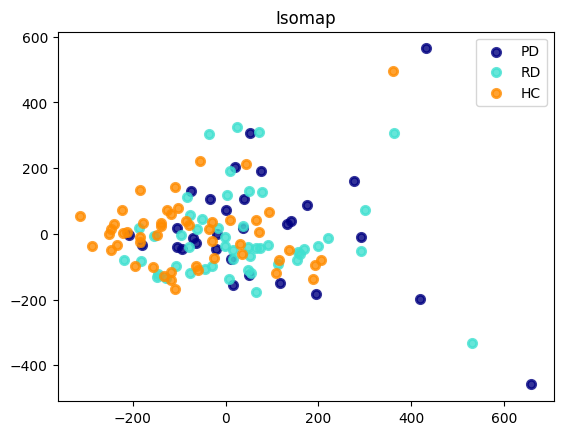

In [21]:
embedding = Isomap(n_neighbors=6)

X_imap = embedding.fit_transform(X)

plt.figure()
for color, i, target_name in zip(colors, labels, target_names):
    plt.scatter(
        X_imap[y == i, 0], X_imap[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Isomap")

# Feature selection
- logistic regression with L1 regularization can remove variables with low predictive power from the dataset

## Variables sorted by their predictive power, displaying first 8
- using l1 regularization
- both give very similar results
- out of the first 8 most significant 
    - 6 - monologue
    - 2 - reading
    - monologue seems to be a better predictor than reading => mozna je monolog vice ovlivneny nemoci nez reading?

In [22]:
num_of_variables_displayed = 24

[['PauseInt_monologue' 1.403589152864828]
 ['SpeechRate_reading' 0.5550886312915316]
 ['GapingInt_monologue' 0.49967259927465657]
 ['SpeechAcceleration_monologue' 0.40676316422596037]
 ['SpeechRate_monologue' 0.3702482906060732]
 ['UnvoicedStops_monologue' 0.34193723137224585]
 ['RespirationPauseInt_monologue' 0.33949603713377574]
 ['RespirationSpeechRate_reading' 0.30682287177956613]
 ['UnvoicedFricativesDecay_monologue' 0.30111450937611545]
 ['RelativeRespirationLoudness_monologue' 0.2733428941009938]
 ['PauseInt_reading' 0.26184382263951006]
 ['UnvoicedFricativesDecay_reading' 0.22868018872537133]
 ['RelativeRespirationLoudness_reading' 0.2255640689978044]
 ['UnvoicedStops_reading' 0.22266182813596952]
 ['RespiratoryExcancheLatency_monologue' 0.18586487202609037]
 ['RespirationPauseInt_reading' 0.1637572923282411]
 ['Entropy_reading' 0.14894111778436003]
 ['RespiratoryExcancheLatency_reading' 0.14334970755452972]
 ['SpeechAcceleration_reading' 0.10389599768146277]
 ['Entropy_monolog

<AxesSubplot:>

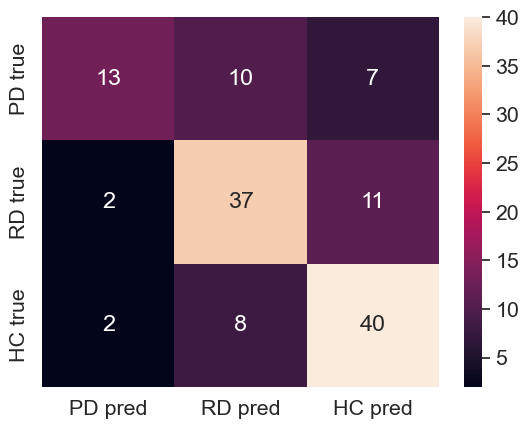

In [23]:
# Standardize the train and test sample
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform GridSearchCV to tune best-fit LR model
param = {'C': np.linspace(10**-2, 10**2, 15)}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_std, y)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(X_std, y)

d = np.column_stack((np.array(X.columns),abs(model.coef_[0])))
significant_varsl1 = d[d[:, 1].argsort()][::-1]

sig_vars = significant_varsl1[:num_of_variables_displayed]
print(sig_vars)

y_pred = model.predict(X_std)

cmtx = confusion_matrix(y, y_pred, labels=[1, 2, 3])

df_cm = pd.DataFrame(cmtx, columns=["PD pred","RD pred","HC pred"])
df_cm.index = ["PD true","RD true","HC true"]
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size

- with l2 regularization

[['PauseInt_monologue' 1.4190912227052896]
 ['SpeechRate_reading' 0.5987675421317262]
 ['GapingInt_monologue' 0.5074981531893318]
 ['SpeechRate_monologue' 0.4123060306877723]
 ['SpeechAcceleration_monologue' 0.4056549096372795]
 ['UnvoicedStops_monologue' 0.3452049423926045]
 ['RespirationPauseInt_monologue' 0.341611306572605]
 ['RespirationSpeechRate_reading' 0.32932984223260126]
 ['UnvoicedFricativesDecay_monologue' 0.31157679580729153]
 ['RelativeRespirationLoudness_monologue' 0.2944425298615012]
 ['PauseInt_reading' 0.2594737107222748]
 ['RelativeRespirationLoudness_reading' 0.24248659789258487]
 ['UnvoicedFricativesDecay_reading' 0.23722824696168748]
 ['UnvoicedStops_reading' 0.23131854974581068]
 ['RespiratoryExcancheLatency_monologue' 0.18716820484196733]
 ['Entropy_reading' 0.15929159756162678]
 ['RespirationPauseInt_reading' 0.15650812640354997]
 ['RespiratoryExcancheLatency_reading' 0.14449707592396546]
 ['SpeechAcceleration_reading' 0.10959612642536415]
 ['VoicedInt_reading'

<AxesSubplot:>

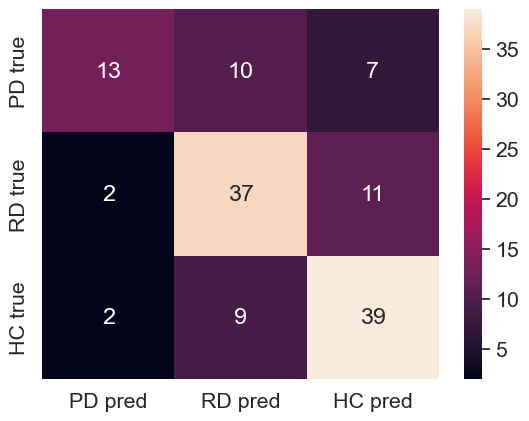

In [24]:
# Standardize the train and test sample
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform GridSearchCV to tune best-fit LR model
param = {'C': np.linspace(10**-2, 10**2, 15)}

lr_model = LogisticRegression(penalty='l2', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_std, y)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, solver='liblinear')

model.fit(X_std, y)

d = np.column_stack((np.array(X.columns),abs(model.coef_[0])))
print(d[d[:, 1].argsort()][::-1][:num_of_variables_displayed])

y_pred = model.predict(X_std)

cmtx = confusion_matrix(y, y_pred, labels=[1, 2, 3])

df_cm = pd.DataFrame(cmtx, columns=["PD pred","RD pred","HC pred"])
df_cm.index = ["PD true","RD true","HC true"]
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size